In [38]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta

Построим графики априорного распределения для разных параметров. Сопряженное к $Bern(p)$ — $Beta(\alpha_0, \beta_0)$.
Подберем параметры априорного распределения так, чтобы они соотносились со знаниями о монете:

* "монета скорее честна" — (5, 5)
* "монета нечестная" — (0.3, 0.3)
* "монета скорее нечестная, перевес в сторону герба" — (5, 0.3)

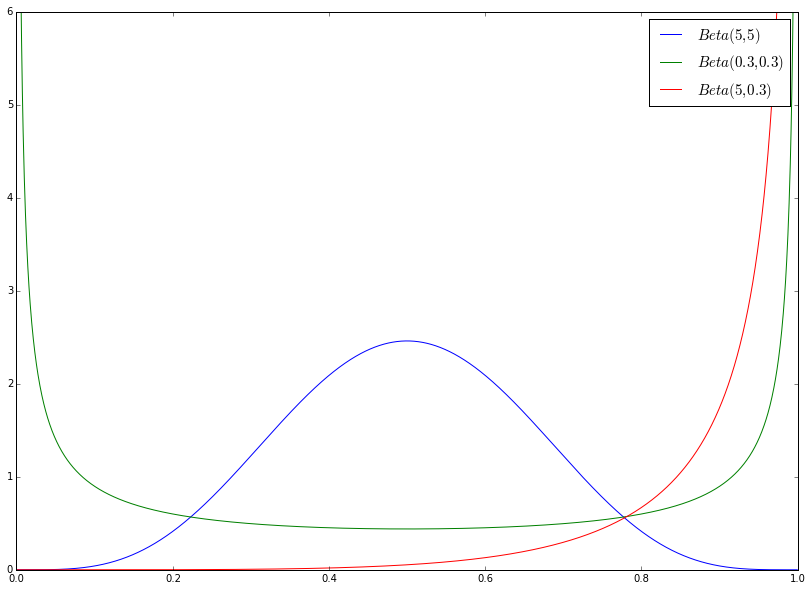

In [39]:
plt.figure(figsize=(14, 10))
x_axis = np.arange(0, 1, 0.0005)

plt.plot(x_axis, beta.pdf(x_axis, 5, 5), label='$Beta(5, 5)$')
plt.plot(x_axis, beta.pdf(x_axis, 0.3, 0.3), label='$Beta(0.3, 0.3)$')
plt.plot(x_axis, beta.pdf(x_axis, 5, 0.3), label='$Beta(5, 0.3)$')

plt.ylim(ymax=6)
plt.legend(fontsize=15)
plt.show()

Найдем теперь **байесовские оценки** вероятности выпадения герба при различных параметрах априорного распределения.

$$\widehat{\theta} = \frac{\alpha_0 + \sum{X_i^2}}{\alpha_0 + \beta_0 + n},$$

где $(\alpha_0, \beta_0) = (5, 5), \ (0.3, 0.3), \ (5, 0.3).$

Оценка максимального правдоподобия равна:

$$\widehat{\theta}_\text{МП} = \overline{X}$$

Сгенерируем выборку $X_1, \dots, X_{20}$ с различными значениями $p$ и построим график модуля отклонения оценок от истинных значений параметра $p$:

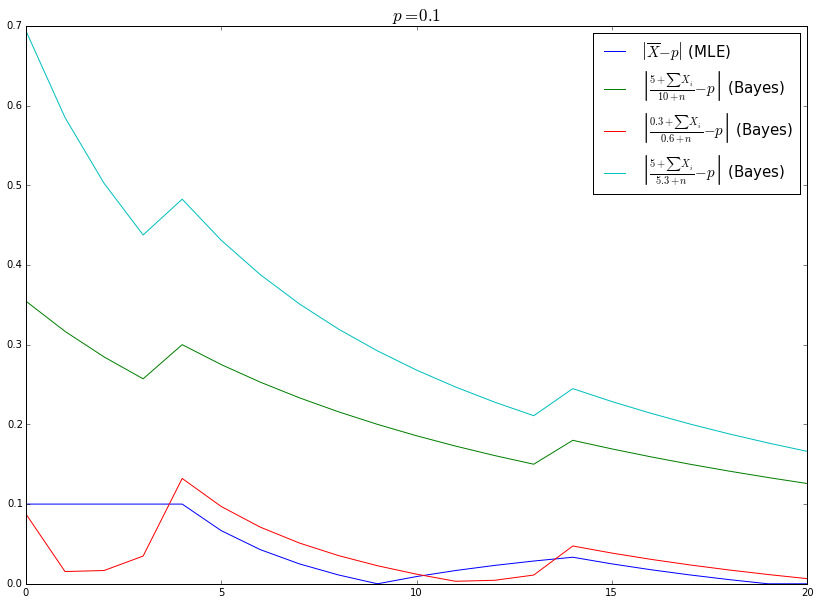

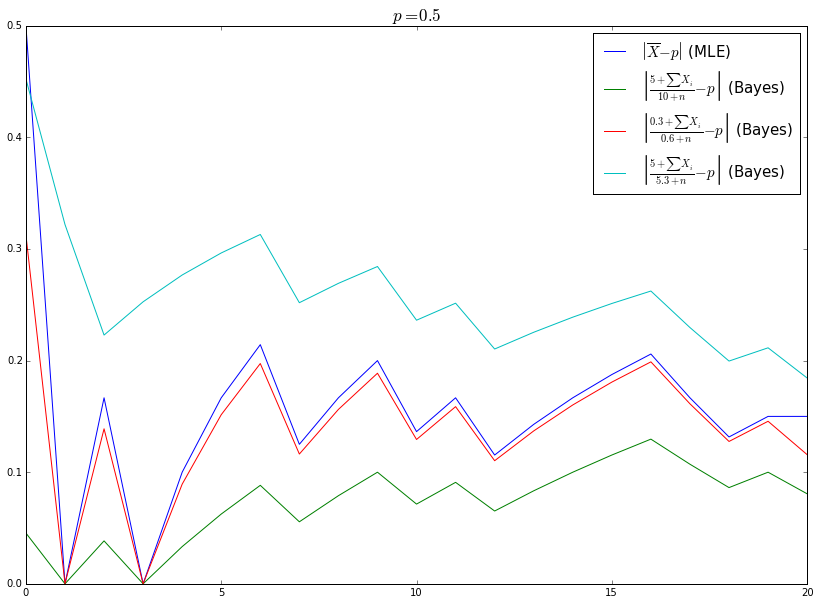

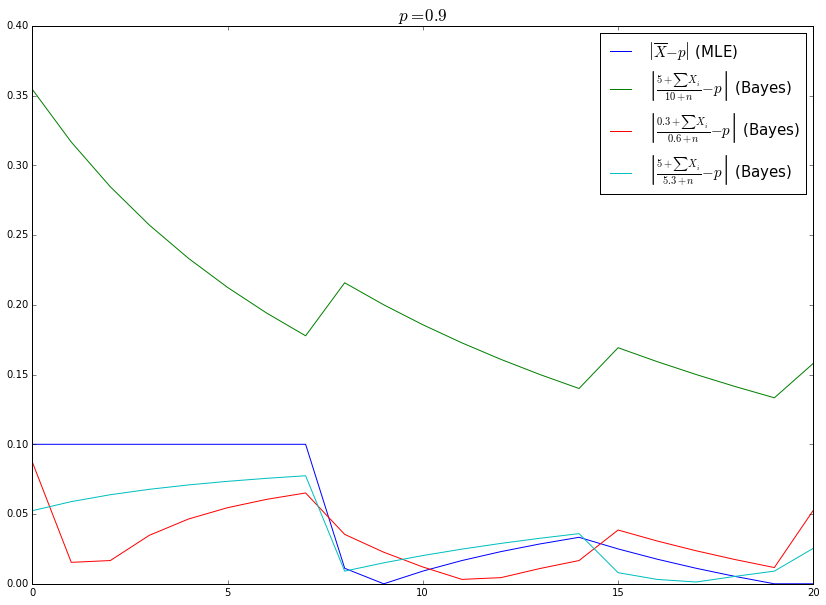

In [52]:
N = 20

def estimate(p):
    x_dist = binom.rvs(n=1, p=p, size=N)
    mle = [np.average(x_dist[:n]) 
           for n in range (1, N + 2)]
    bayes1 = [(5 + np.sum(x_dist[:n])) / (10 + n) 
              for n in range (1, N + 2)]
    bayes2 = [(0.3 + np.sum(x_dist[:n])) / (0.6 + n) 
              for n in range (1, N + 2)]
    bayes3 = [(5 + np.sum(x_dist[:n])) / (5.3 + n) 
              for n in range (1, N + 2)]
    plt.figure(figsize=(14, 10))
    plt.plot(abs(np.zeros(N + 1) + p - mle), 
             label='$\\left| \\overline{X} - p \\right|$ (MLE)')
    plt.plot(abs(np.zeros(N + 1) + p - bayes1), 
             label='$\\left| \\frac{5 + \\sum{X_i}}{10 + n} - p \\right|$ (Bayes)')
    plt.plot(abs(np.zeros(N + 1) + p - bayes2), 
             label='$\\left| \\frac{0.3 + \\sum{X_i}}{0.6 + n} - p \\right|$ (Bayes)')
    plt.plot(abs(np.zeros(N + 1) + p - bayes3), 
             label='$\\left| \\frac{5 + \\sum{X_i}}{5.3 + n} - p \\right|$ (Bayes)')
    plt.legend(fontsize=15)
    plt.title('$p = ' + str(p) + '$', fontsize=17)
    plt.show()
    

estimate(0.1)
estimate(0.5)
estimate(0.9)

Получили следующие наилучшие оценки:

* $p = 0.1$ — байесовская с априорным распределением, соответствующим "монета нечестная"
* $p = 0.5$ — байесовская с априорным распределением, соответствующим "монета скорее честна"
* $p = 0.9$ — байесовская с априорным распределением, соответствующим "монета скорее нечестная, перевес в сторону герба"

Из этого следует, что если предположения верны, то байесовские оценки с априорными распределениями, соответствующими этим
предоположениям, помогают сделать наилучшую оценку.